In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
path = r'/Users/andrenedvidek/Desktop/Data Analaysis/CareerFoundry /Data Emersion /Task 6.1/02 Data/Prepared Data'

In [3]:
df_realtor = pd.read_pickle(os.path.join(path,'realtor-data_clean.pkl'))

In [4]:
df_realtor.head()

,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [5]:
df_realtor.dtypes

status             object
price             float64
bed               float64
bath              float64
acre_lot          float64
street            float64
city               object
state              object
zip_code          float64
house_size        float64
prev_sold_date     object
dtype: object

In [6]:
# pick out only numerical columns so I can perform correlation analysis

columns_keep = ['price', 'bed', 'bath', 'acre_lot', 'house_size',]

In [7]:
#create new datafram with only the numberical columns 
df_for_corr = df_realtor[columns_keep].copy()

In [8]:
df_for_corr.head()

,price,bed,bath,acre_lot,house_size
0,105000.0,3.0,2.0,0.12,920.0
1,80000.0,4.0,2.0,0.08,1527.0
2,67000.0,2.0,1.0,0.15,748.0
3,145000.0,4.0,2.0,0.10,1800.0
4,65000.0,6.0,2.0,0.05,NaN


### I want to cross reference Data Price and State as well as city 
### I also want to compare the property size with the state and city 
### Look at what the strongest predictors for price are among the skews 


In [9]:
# looking for correlations 
df_for_corr.corr()

,price,bed,bath,acre_lot,house_size
price,1.000000,0.114728,0.178362,0.015774,0.000254
bed,0.114728,1.000000,0.611698,-0.000017,0.189635
bath,0.178362,0.611698,1.000000,-0.000959,0.223709
acre_lot,0.015774,-0.000017,-0.000959,1.000000,0.000988
house_size,0.000254,0.189635,0.223709,0.000988,1.000000


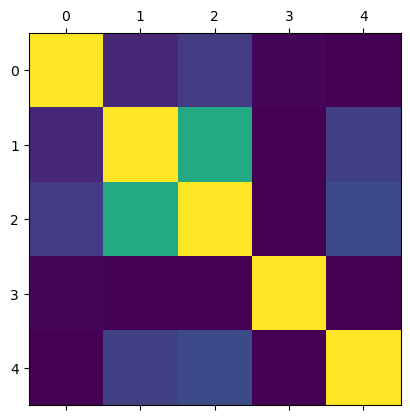

In [10]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_for_corr.corr())
plt.show()

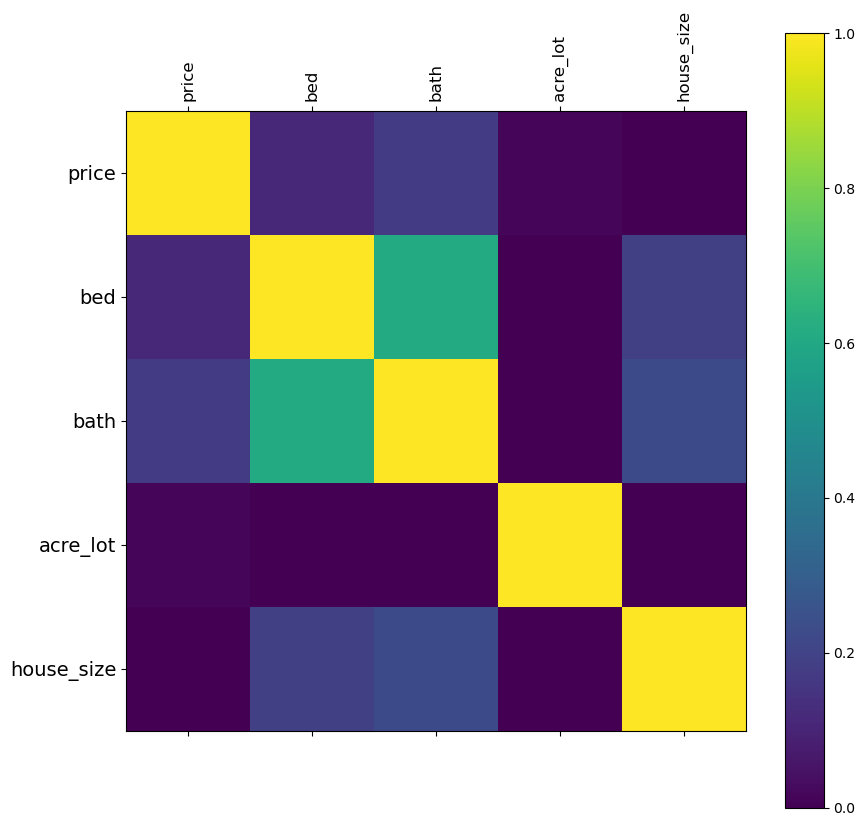

In [11]:
# add a legend 

f = plt.figure(figsize=(10, 10)) 
plt.matshow(df_for_corr.corr(), fignum=f.number) 
plt.xticks(range(df_for_corr.shape[1]), df_for_corr.columns, fontsize=12, rotation=90)
plt.yticks(range(df_for_corr.shape[1]), df_for_corr.columns, fontsize=14) 
cb = plt.colorbar() 
plt.show()


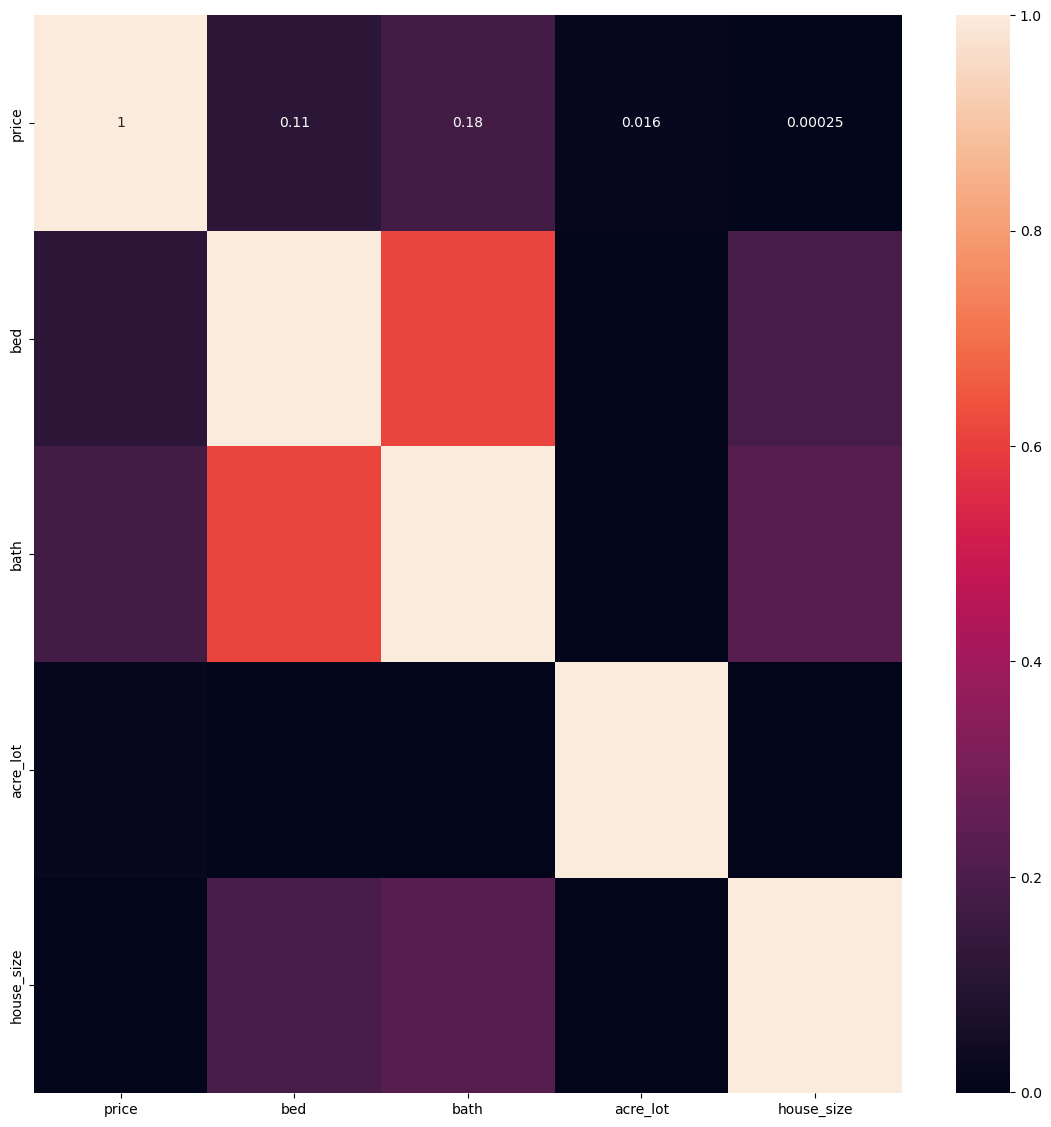

In [12]:
f,ax = plt.subplots(figsize=(14,14))


corr = sns.heatmap(df_for_corr.corr(), annot=True, ax=ax)



### This is quite intresting. There does not seem to be any medium or strong correlation between a house feature and the price
### This makes me belive that it is much more depnedent on location. However that I will have to analyse later

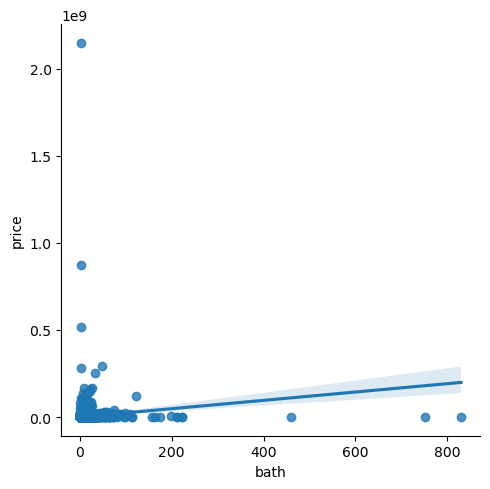

In [13]:
# I useed the feature of the house that has the highest correlation to the price. Even knowing that is is not significant

sns.lmplot(x = 'bath', y = 'price', data = df_for_corr)

In [14]:
### It is interesting to see that while the scatter plot shows a linear correlation, it actually is not.
### If we look at the start of the Graph we can see that there are many outliers in which the cost of the house if very high and the bathroom very small


In [ ]:
# pair plot

g = sns.pairplot(df_for_corr)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

In [ ]:
sns.histplot(df_for_corr['price'], bins=20, kde=True)

In [ ]:
threshold = df_for_corr['price'].quantile(0.99)  # Adjust the quantile as needed

# Remove the outlier
df_no_outlier = df_for_corr[df_for_corr['price'] < threshold]

# Plot the histogram without the outlier
sns.histplot(df_no_outlier['price'], bins=40, kde=True)
plt.show()

In [ ]:

# Plot the histogram without the outlier
sns.histplot(df_for_corr['price'], bins = 40, kde = True)

In [ ]:
print(df_for_corr['price'].dtype)

In [ ]:
df_for_corr['price'] = pd.to_numeric(df_for_corr['price'], errors='coerce')

In [ ]:
df_for_corr.loc[df_for_corr['price'] < 300000, 'Price category'] = 'Low price'

In [ ]:
df_for_corr.loc[(df_for_corr['price'] >= 300000) & (df_for_corr['price'] < 750000), 'Price category'] = 'Medium price'


In [ ]:
df_for_corr.loc[df_for_corr['price'] >= 750000, 'Price category'] = 'High price'

In [ ]:
df_for_corr['Price category'].value_counts(dropna = False)

In [ ]:
## for later g.figure.savefig(os.path.join(path,'hisst_orders_dow.png'))